# Punto 1 - Taller 1

<b>Desarrolldo Por:</b>
* Juan Camilo
* Diego
* Ricardo

Este dataset consiste en los registros de ventas de hogares que se han llevado a cabo en Seattle (USA) en un periodo que comprende cerca de un año, entre 2014 y 2015. 

### <i>IMPORTANTE:</i>

Este NoteBook se encuenta dividido en  2 secciones, las cuales se resumen a continuación:

* SECCIÓN A: 
    
    Se desarrolla un análisis general de las varibles contenidas en el dataset y se realizan consideraciones sobre algunas de ellas en terminos de representación de la información y selección de variables.
    

* SECCIÓN B: 


Referencias:

Kernel de Kaggel: <a href="https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices
">aqui</a>



In [69]:
import datetime
import pandas as  pd
import numpy as np
import pandas_profiling 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

NameError: name 'x' is not defined

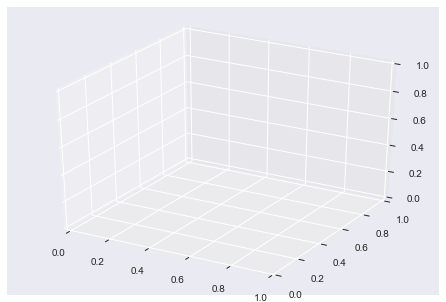

In [70]:
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(x,y,z,c=z,cmap=plt.cm.jet)
plt.show()

# Funciones  utiles

In [2]:
def plot_matriz_confusion(y_test, y_pred):
    array = confusion_matrix(y_test, y_pred)
    filas = array.shape[0]
    colunas = array.shape[1]
    df_cm = pd.DataFrame(array, index = [i for i in range(filas)],
                  columns = [i for i in range(colunas)])
    plt.figure(figsize = (4,2))
    sns.set(font_scale=1.2)
    sns.heatmap(df_cm, annot=True,fmt='g') 

def plot_mapas_calor_filas(lista_parametros,grid_results,titulos_metricas, nombre_kernel, figsize):
    x_name = lista_parametros[0] 
    x_labels = param_grid[x_name] if x_name is not None else [""]
    y_name = lista_parametros[1] 
    y_labels = param_grid[y_name] if y_name is not None else [""]
    filas = len(y_labels)

    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=figsize)
    fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.5)
    i=0
    for ax, nombres_test in zip(axs.flat, titulos_metricas.keys()):
        im_mc = ax.matshow(grid_results['mean_test_'+nombres_test].reshape(filas,-1),vmin=0, cmap="viridis") 
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name) if i==0 else None
        ax.set_title(nombres_test+" - Kernel "+nombre_kernel)
        ax.set_xticks(range(len(x_labels)))
        ax.set_xticklabels(x_labels)
        ax.set_yticks(range(len(y_labels)))
        ax.set_yticklabels(y_labels)
        ax_divider = make_axes_locatable(ax)
        # add an axes to the right of the main axes.
        
        color_bar_side = "right" if x_name is None else "bottom"
        cax = ax_divider.append_axes(color_bar_side, size="10%", pad="10%")
        colorbar(im_mc, cax=cax, orientation="vertical")
        i+=1
    plt.tight_layout()
    plt.show()

def plot_series(grid_results,titulos_metricas,figsize):
    plt.figure(figsize=figsize)
    for nombres_test in titulos_metricas:
        valores = grid_results["mean_test_"+nombres_test]
        plt.plot(range(len(valores)),valores,label=nombres_test)
    plt.legend()
    plt.xlabel('Combinaciones')
    plt.ylabel('Metrica')
    plt.show()
    
def plot_impotancia_atributos(lista_atributos,estimador):
    plt.barh(range(len(lista_atributos)), estimador.coef_, align='center') 
    plt.yticks(range(len(lista_atributos)), lista_atributos, rotation = 0) 
    plt.xlabel("Importancias de los Atributos")
    plt.ylabel("Atributos")
    
def caracteristicas_fecha(fecha):
    FF = datetime.datetime.strptime(fecha, "%Y%m%dT%H%M%S")
    return FF.year, FF.month, FF.day, FF.weekday()

---

# SECCION A. 

## 1. Carga del Dataset

In [3]:
df = pd.read_csv("kc_house_data.csv")
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### - Eliminación de la variable "id"

Antes de continuar, queda claro que el identificador de venta (<b>id</b>) asociado a cada registro deberá ser eliminado del dataset.

In [4]:
df.drop(["id"], axis = 1, inplace = True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 2. Exploración Inicial

### - Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.3+ MB


### - Estadisticos de variables Numéricas

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### <i>IMPORTANTE:</i> La siguiente etapa es solo exploratoria

+ Caracteristicas sobre la variable Fecha
+ Primera y Ultima Venta
+ Dias y ventas por años
+ Frecuencias de Ventas por Dia, mes, dia de la Seman y año

#### Caracteristicas sobre la variable Fecha

En este punto es importante destacar que la fecha se encuentra en un formato inadecuado para el algoritmo a implementar (Regresión Lasso). Por tal motivo se desarrolla la extracción de cuatro caracteristicas a partir del objetos (stings) contenidos por "<b>Date</b>". 

In [7]:
attrs_fecha = df["date"].apply(caracteristicas_fecha)
df_attrs_fecha = pd.DataFrame(list(attrs_fecha), columns = ["year","month","day","weekday"])
df_attrs_fecha.head(3)

,year,month,day,weekday
0,2014,10,13,0
1,2014,12,9,1
2,2015,2,25,2


#### Primera y Ultima Venta

In [8]:
fechas_sort = df_attrs_fecha.sort_values(by=["year","month","day"],ascending=True)
print(fechas_sort.head(1))
print(fechas_sort.tail(1))

     year  month  day  weekday
172  2014      5    2        4
       year  month  day  weekday
16594  2015      5   27        2


#### Dias y ventas por años

In [9]:
d1 = datetime.datetime(year=2014,month=5,day=2) 
dm = datetime.datetime(year=2014,month=12,day=31) 
d2 = datetime.datetime(year=2015,month=5,day=27) 

delta14 = (dm - d1)
delta15 = (d2 - dm)

dias14 = delta14.days
dias15 = delta15.days

ventas14 = len(df_attrs_fecha[df_attrs_fecha["year"] == 2014])
ventas15 = len(df_attrs_fecha[df_attrs_fecha["year"] == 2015])

print(f"Dias 2014: {dias14}  -  Ventas: {ventas14}  -  Razon: {ventas14/dias14}")
print(f"Dias 2015: {dias15}  -  Ventas: {ventas15}  -  Razon: {ventas15/dias15}")

Dias 2014: 243  -  Ventas: 14633  -  Razon: 60.218106995884774
Dias 2015: 147  -  Ventas: 6980  -  Razon: 47.48299319727891


#### Frecuencias de Ventas por Dia, mes, dia de la Seman y año

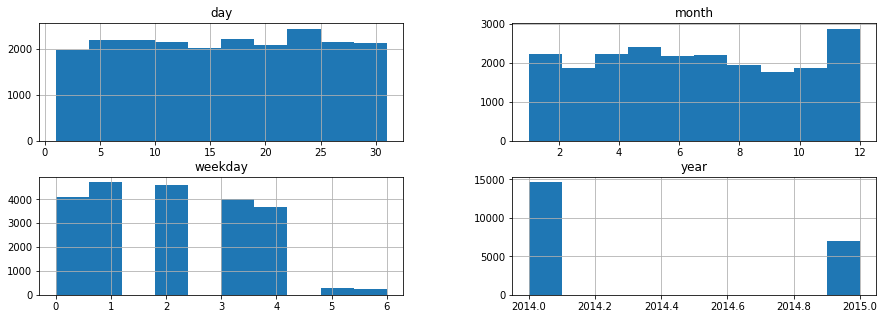

In [10]:
_ = df_attrs_fecha.hist(figsize=(15,5))

#### OBSERVACIONES SOBRE LOS DATOS 

#### - IMPOTANTE: Esta observaciones no estan relacionadas directamente con la tarea de regresión

- Se puede oservar que no existe variacione signifcativas en la frecuencia de la ventas desarrolladas  en los diferentes dias del mes.

- A pesar de que no se cubren todos los meses de los dos años con este conjunto de datos es interesante ver como el mes de mayor número de compras es el mes de diciembre.

- Los fines de semana se desarrolla muchas menos compras.

- De las ventas por dias transcurridos en cada añoy de la imagen anterior queda claro que el 2014 tuvo un mayor número de ventas por día, sin embargo, es importante considerar que en el mes de diciembre del 2014 el número de ventas incrementó significativamente y esto puede contribuir a una metrica mayor para tal año.

-----

### <i>IMPORTANTE:</i>

Es importante desarrollar una consideración previa a la implementación del algoritmo y selecció de variables. 

<b>Consideración 1</b>: El desarrollo de transacciones en el orden de los cientos de miles a los millones de dolares no son decisiones de compra que se ven asociadas a dias especiales del mes o la semana, por tal motivo se no se contemplan estas variables.

<b>Consideración 2</b>: El objetivo de implementar un modelo a partir de los datos obtenidos entre 2014 y 2015 es la estimación a futuro de los pecios de vivienda, es decir, en los meses posteriores a la ultima fecha de venta, por tal razón la consideración del año como variable no se considera adecuada,  puesto que las compras se desarrollarán a partir del año 2015 (no se podrán jecutar compras en el 2014).

-----

## - Distribuciones de Precios en función de los meses

In [11]:
meses_precio = pd.concat([df_attrs_fecha["month"],df["price"]],axis = 1)

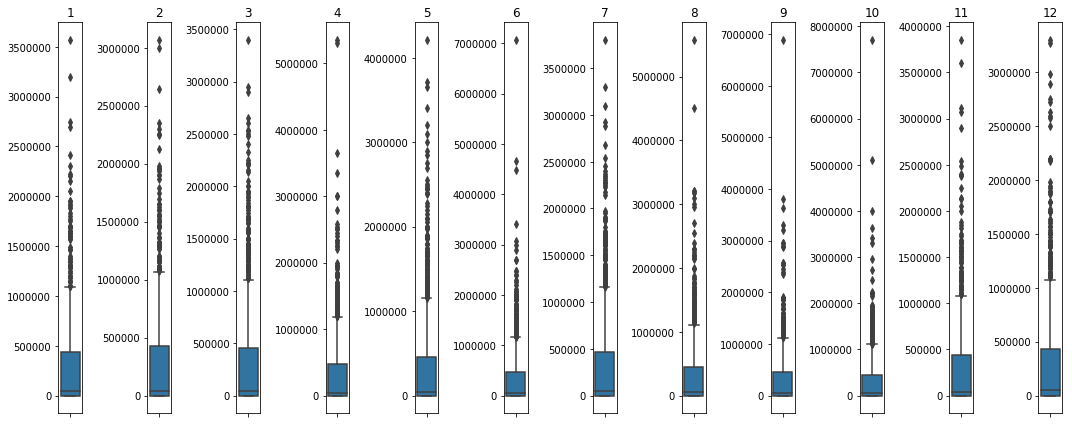

In [12]:
fig, axs = plt.subplots(1, len(meses_precio["month"].unique()), figsize=(15,6))

for i in range(len(meses_precio["month"].unique())):
    axs[i].set_title(f"{i+1}")
    sns.boxplot(meses_precio[meses_precio["month"]==i+1], ax = axs[i], orient = 'v')

plt.tight_layout()

In [13]:
#Otra Forma. Sin embargo, por los valores extremos no se observa bien el rango intercuartilico.
#ax = sns.boxplot(x="month", y="price", data=meses_precio)

## - Distribuciones de Precios en función del grado

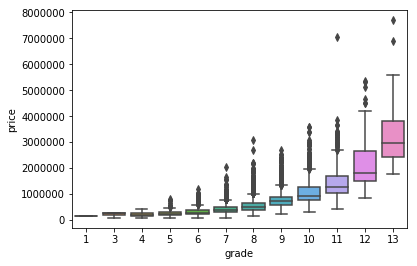

In [14]:
ax = sns.boxplot(x="grade", y="price", data=df)

## - Distribuciones de Precios en función de la condición

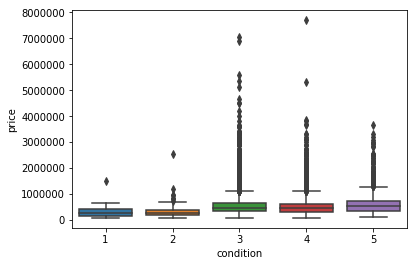

In [15]:
ax = sns.boxplot(x="condition", y="price", data=df)

## - Distribuciones de Precios en función del número de pisos de las viviendas

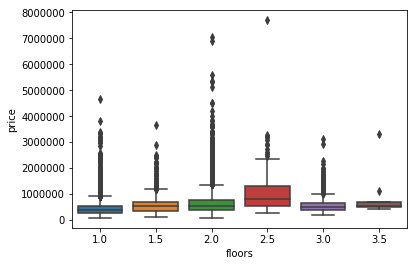

In [16]:
ax = sns.boxplot(x="floors", y="price", data=df)

-----

## - Eliminación de la variable "date", concatenación de la Serie "month"

In [17]:
df2 = pd.concat([df,df_attrs_fecha["month"]],axis = 1)
df2.drop(["date"],axis = 1, inplace = True)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


## - Profiling

In [19]:
report = pandas_profiling.ProfileReport(df2)
report

Number of variables,20
Number of observations,21613
Total Missing (%),0.0%
Total size in memory,3.3 MiB
Average record size in memory,160.0 B
Numeric,19
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [20]:
report.get_rejected_variables()

[]

### <i>NOTA IMPORTANTE</i>:

Claramente el profiling no ha rechazado ninguna de las variables, sin embargo, es importante desarrollar una consideración sobre la variable que hace referencia al código zip, puesto que esta variable es un identidicador de zona, la cual puede estar relaciónada con los costos medios de las viviendas. 

De esta forma se planea implementar la media de precio de la zona que hace referencia al código Zip.


## - Exploración por Georeferenciación

In [21]:
print("longitud: ",df["long"].min(),df['long'].max())
print("latitud:  ",df["lat"].min(),df['lat'].max())

longitud:  -122.51899999999999 -121.315
latitud:   47.1559 47.7776


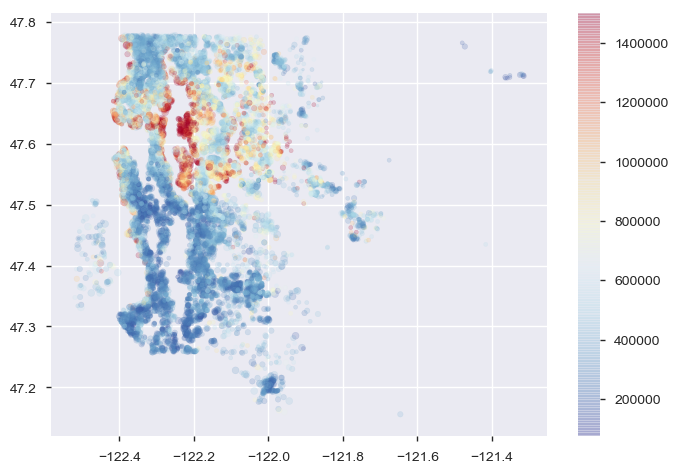

In [22]:
cm = plt.cm.get_cmap('RdYlBu_r')
sc = plt.scatter(df["long"],df["lat"], alpha = 0.2, vmin=df["price"].min(), vmax= 1500000
                ,c = df["price"], s = df["condition"]**2, cmap=cm)
plt.colorbar(sc);

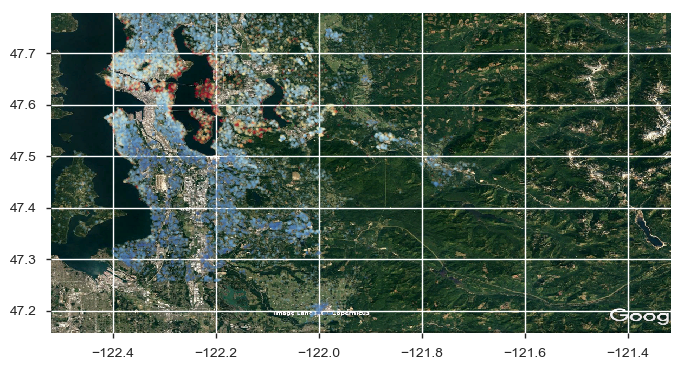

In [30]:
#import itk
import imread
cm = plt.cm.get_cmap('RdYlBu_r')
img=imread.imread('seattle.png')
#img=itk.imread('seattle.png')


plt.scatter(df["long"],df["lat"], alpha = 0.2, vmin=df["price"].min(), vmax= 1500000
                ,c = df["price"], s = df["condition"]**(1/2), cmap=cm)
plt.imshow(img,extent=[df["long"].min(),df['long'].max(),df["lat"].min(),df["lat"].max()]);

## Implementando Folium (ATENCIÓN: Si no se logra ver el mapa, se debe ejecutar)

Documentación de Folium <a href="https://python-visualization.github.io/folium/">aqui</a>

In [32]:
import folium
from folium.plugins import HeatMap

In [55]:
c =folium.Map(location=[47.7776, -122.518],  zoom_start=9.4)
c

In [67]:
m = folium.Map(
    location=[45.5236, -122.6750],
    #tiles='Stamen Toner',
    zoom_start=13
)

folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[45.5215, -122.6261],
    radius=50,
    popup='Laurelhurst Park',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(m)


m.save("mapa.html")

Plotting an static image over an interactive map
## https://ocefpaf.github.io/python4oceanographers/blog/2015/07/13/interactive_geo/
http://qingkaikong.blogspot.com/2016/06/using-folium-5-image-overlay-overlay.html



In [68]:
# Punto de precio Maximo
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
df_copy['count'] = 1
basemap = generateBaseMap()

# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap.save("basemap.html")

In [63]:
# Punto de precio Maximo
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
df_copy['count'] = 1
basemap = generateBaseMap()

# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

In [64]:
m = folium.Map(
    location=[40.965, -5.664],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'plaza Mayor'

folium.Marker([40.965, -5.664], popup='Plaza Mayor', tooltip=tooltip).add_to(m)


m

----

## 3. Preparación y Preprocesamiento

### - Matriz de correlación

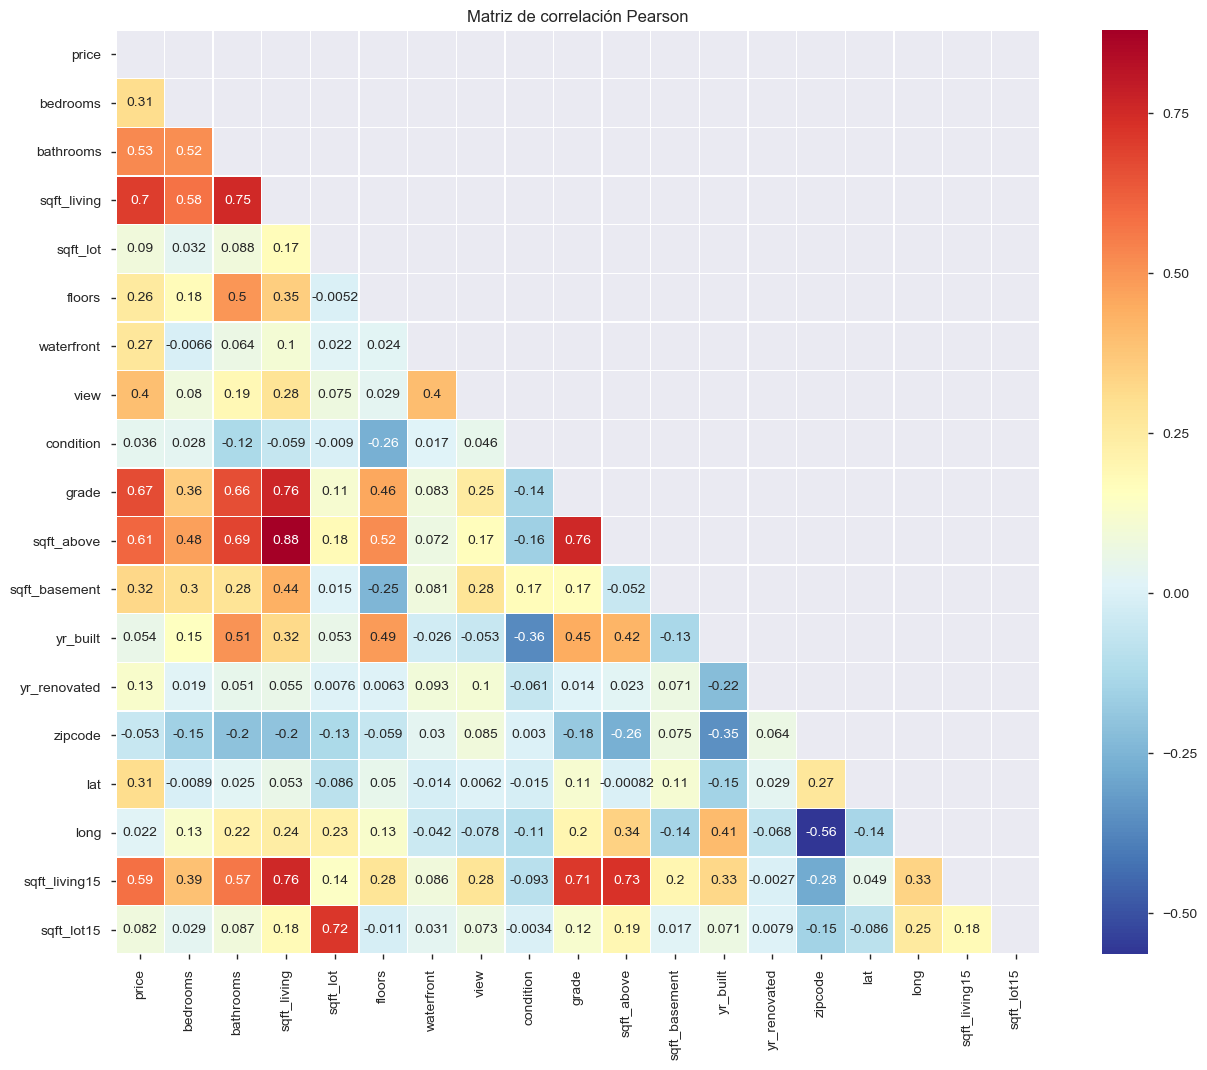

In [25]:
mask = np.zeros_like(df.corr(), dtype=np.bool)  # 
mask[np.triu_indices_from(mask)] = True         # 

fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Matriz de correlación Pearson')

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.88,square=True,cmap="RdYlBu_r", linecolor='w',annot=True,mask=mask);

Si bien ya se habia desarrollado la matriz de correlación a través de profiling de <b>pandas</b>, la matriz de correlación anterior permite visualizar los valores de correlación exactos por medio de la metrica "Pearson". 

Bajo este panorama, no se decide relizar la eliminación de ninguna de las variables presentadas en la matriz de correlación, por efectos de la bondad entregada por el estimador Lasso en terminos de selección de variables puesto que es posible que el estimador descarte un par de variables.

## - Dato Interesante sobre la Variable "month"

Durante la  exploración y etapas de entrenamiento prelimires a la entrega se comprobó que la creación de variables dummies para la variable mes no tiene impacto significativo en el mdelo (lineal - Lasso), de modo que los pesos (pendietes)  de cada una de las variables dummies del mes presentaron valores cercanos al cero, como se puede observar en la siguiente imagen.

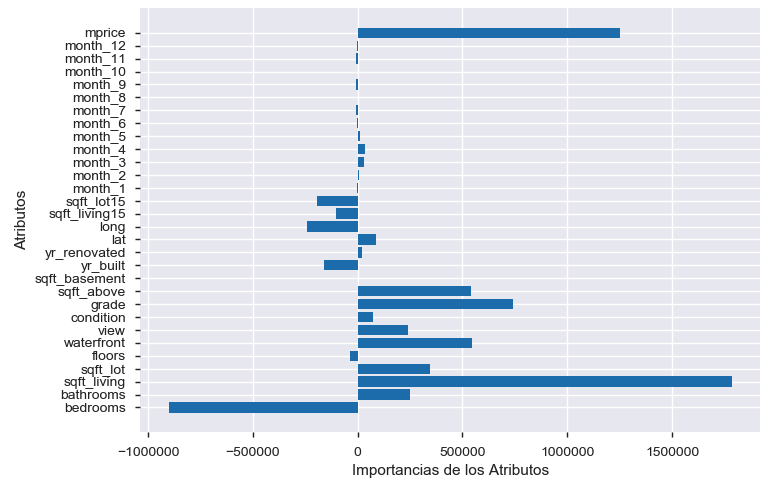

In [26]:
df3 = df2

## - Train-Test Estratificada 

In [28]:
X = df3.drop(["price"],axis = 1)
y = df3["price"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=df["zipcode"], test_size=0.2, random_state=42)

## - Medias de las Localidades definidas por el código Zip

In [30]:
Xy = pd.concat([X_train,y_train], axis = 1)
zip_mprcice = Xy.groupby("zipcode")["price"].agg('mean')
zip_mprcice = pd.DataFrame(zip_mprcice)
zip_mprcice.rename({"price":"mprice"}, axis=1,inplace=True)
zip_mprcice.head(3)

,mprice
zipcode,
98001,279417.796552
98002,237569.012579
98003,293046.910714


## - Asignación de la media de los precios al conjunto de entrenamiento y testeo

In [31]:
X_train_mp = X_train.merge(zip_mprcice,on="zipcode",how="left")
X_test_mp  = X_test.merge(zip_mprcice,on="zipcode",how="left")

## - Eliminación de la Variable Zipcode

In [32]:
X_train_mp.drop(["zipcode"], axis = 1, inplace = True)
X_test_mp.drop(["zipcode"], axis = 1, inplace = True)

### <i>IMPORTANTE:</i>

1. Las siguientes variables (numéricas) presentan una correlación positiva con la variable de precio "price":


* grade
* bedrooms
* bathrooms
* floors

    Se analizan numéicas y no se genera variables dummies para aquellas pon pocos valores. Como es esl caso particular de "grade" la cual puede ser vista como variable ordinal.


2. Para desarrollar estimaciones en la etapa de producción se deberá almacenar la tabla (DataFrame) "zip_mprcice", la cual puede asignar los precios en función del código zip y desarrollar las estimacione. Es importante reconocer que las estimaciones de precios de viviendas que se encuentren localizadas en sectores no vistos por el estimador, en terinos del código zip, puede ser un problema. Sin embargo una solución es la asginación del valor medio de la región mas proxima.

## - Normalización

Para Inspeccionar los rangos de los valores de cada variable se visualizan los maximos y minimos en una escala logaritmica

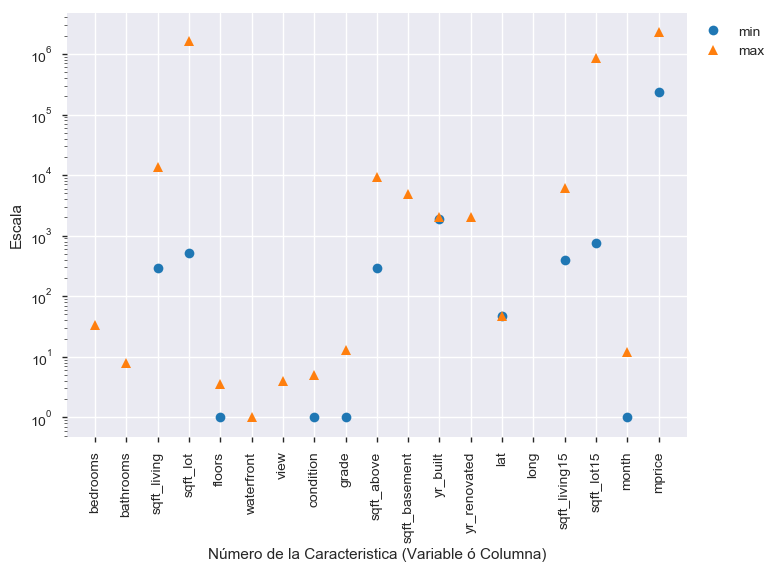

In [33]:
plt.plot(X_train_mp.min(axis=0), 'o', label="min")
plt.plot(X_train_mp.max(axis=0), '^', label="max")
plt.xticks(range(len(X_train_mp.columns.values)),X_train_mp.columns.values,rotation=90)
plt.legend(bbox_to_anchor=(1, 1),loc=2, borderaxespad=0.5)
plt.xlabel("Número de la Caracteristica (Variable ó Columna)")
plt.ylabel("Escala")
plt.yscale("log")

Claramente la escala de las diferentes variable se encuentran en rangos muy distimtos. Por tal motivo para la implementación del estimador Lasso se deberá normalizar o estandarizar todas las variables a una escala sugerida entre 0 y 1.

In [34]:
scaler = MinMaxScaler()
print(scaler.fit(X_train_mp))

MinMaxScaler(copy=True, feature_range=(0, 1))


/Users/juancamilo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [35]:
SX_train_mp = scaler.transform(X_train_mp)
SX_test_mp  = scaler.transform(X_test_mp)

----

## 4. Entrenamiento con estimador Lasso

In [36]:
lasso = Lasso(alpha=10, max_iter=1000)
lasso.fit(SX_train_mp, y_train);

In [37]:
print("Training set score: {:.2f}".format(lasso.score(SX_train_mp, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(SX_test_mp, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.79
Test set score: 0.79
Number of features used: 18


## - Tunning - GridSearch

In [38]:
param_grid = {'alpha': [1,10,20,30],'max_iter':[100000]}
scoring = {"r2":"r2","nRMSE":"neg_mean_squared_error", }
grid = GridSearchCV(Lasso(), param_grid=param_grid, scoring=scoring, refit="r2" , cv=5, n_jobs=-1, 
                    return_train_score= True)
grid.fit(SX_train_mp, y_train)
print()
print("LASSO")
print("Mejor 'score' en cross-validation: {:.2f}".format(grid.best_score_)) 
print("score sobre el conjunto de prueba: {:.2f}".format(grid.score(SX_test_mp, y_test))) 
print("Mejores parameteros: ", grid.best_params_)


LASSO
Mejor 'score' en cross-validation: 0.79
score sobre el conjunto de prueba: 0.79
Mejores parameteros:  {'alpha': 10, 'max_iter': 100000}


In [39]:
y_pred = grid.best_estimator_.predict(SX_test_mp)

## - R2

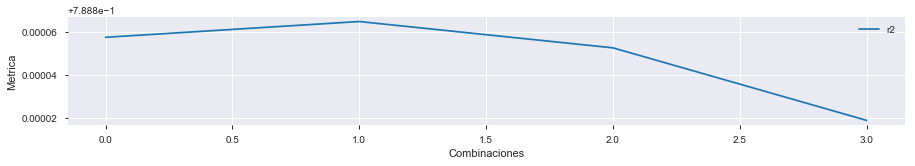

In [82]:
plot_series(grid.cv_results_,["r2"],(15,2));

## - RMSE

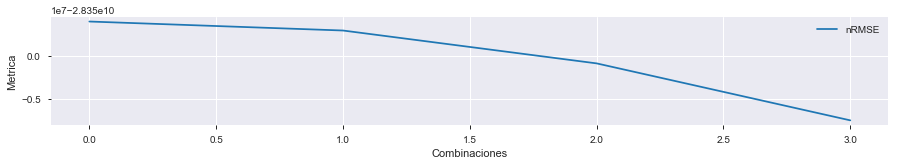

In [83]:
plot_series(grid.cv_results_,["nRMSE"],(15,2));

## Interpretación de Métricas

Como se puede observar en las dos graficas anteriores los valor del $R^2$ y el $RMSE$ no varian significativamente a través de las iteraciones de busqueda grid. Esto supone que el algoritmo converge apidamente al  minimo detectado,  donde valores de regularzación diferentes tienden permiten enontrar rendimientos similares bajo un gran número de iteraciones, en este caso 100000.

## - Importancia de los atributos

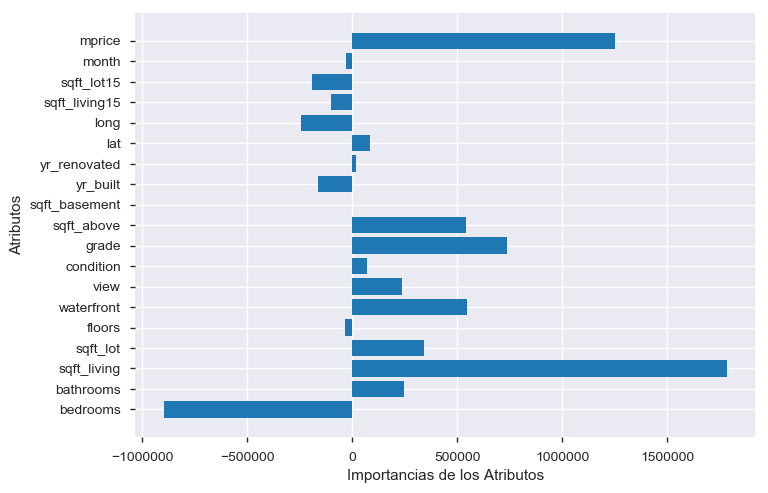

In [42]:
plot_impotancia_atributos(X_train_mp.columns.values, grid.best_estimator_)

-----

## Interpretación

Como se puede observar en la gráfica anterior las variables mas significativas del conjunto de datos para desarrollar estimaciones sobre el valor de las viviendas, en orden de importancia son:

    1. sqft_living
    2. mprice
    3. bedrooms
    4. grade
    5. waterfron
    6. sqft_above

Lo que significa que el area total de la vivienda, el precio medio del sector ( Tomado del Código ZIP) y el número de habitaciones son las 3 varaibles mas sgnificativas del modelo, sin embargo, es muy importante mencionar que el número de dormitorios tiene presenta un peso negativo  en el modelo la estimación del precio de vivienda, a pesar de que en la matriz de correlación presenta una correlación positiva no muy significativa.

Como dato interesante la varible <b>floors</b> presenta un valor de importancia relativamente bajo frente a otras variables, lo que puede suponer que el total de pisos de una vivienda no refeja mayr importancia.

Con respecto a el área relacionada a la vivienda, el orden di importancia queda como:

    1. sqft_living : El área construida de vivienda
    2. sqft_above  : El área construida de vivienda sin contar el área del sotano 
    3. sqft_lot    : El area del lote sobre la cual se ha construio la vivienda

Adicionalmente se observa que el área total del sotano (sqft_basement) no presenta mportancia (peso) alguno sobre la estimación del precio de vivienda.

---